# Topic Modelling
First we download the data that has been preprocessed

In [1]:
import pandas as pd
letters = pd.read_csv('data/preprocessed_letters.csv')

In [11]:
print(letters.columns)

Index(['Unnamed: 0', 'letter', 'year'], dtype='object')


In [14]:
#get the list of letter keys
letterkeys = list(letters['Unnamed: 0'])

In [16]:
lettervalues = list(letters["letter"])
#get the letters

In [18]:
#split into tokens
splitletters = []
for letter in lettervalues:
    splitletters.append(letter.split())

In [20]:
#need to get total number of words
#flatten tokenizedletters
from itertools import chain
#convert to set and back to list
words = list(set(chain(*splitletters)))
print(len(words))

7420


In [21]:
#tokenize preprocessed

#for each tokenized letter make a counter
from collections import Counter

#for each letter 
countletters = {}
for i, letter in enumerate(splitletters):
    countedletter = Counter(letter)
    countletters[letterkeys[i]] = dict(countedletter)

#print(countletters)

In [22]:
# populate matrix 
import numpy as np
letters = sorted(countletters.keys())
bwMat = np.zeros((len(letters), len(words)))

for ib,letter in enumerate(letters):
    for w, v in countletters[letter].items():
        bwMat[ib, words.index(w)] = v
        
print(bwMat)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#AAAAAAAAAAAAA

In [23]:
# The hierarchical clustering encoded as a linkage matrix.
#average linkage best
import scipy
distMat = scipy.spatial.distance.pdist(bwMat, "correlation")
linkage_matrix = scipy.cluster.hierarchy.average(distMat)


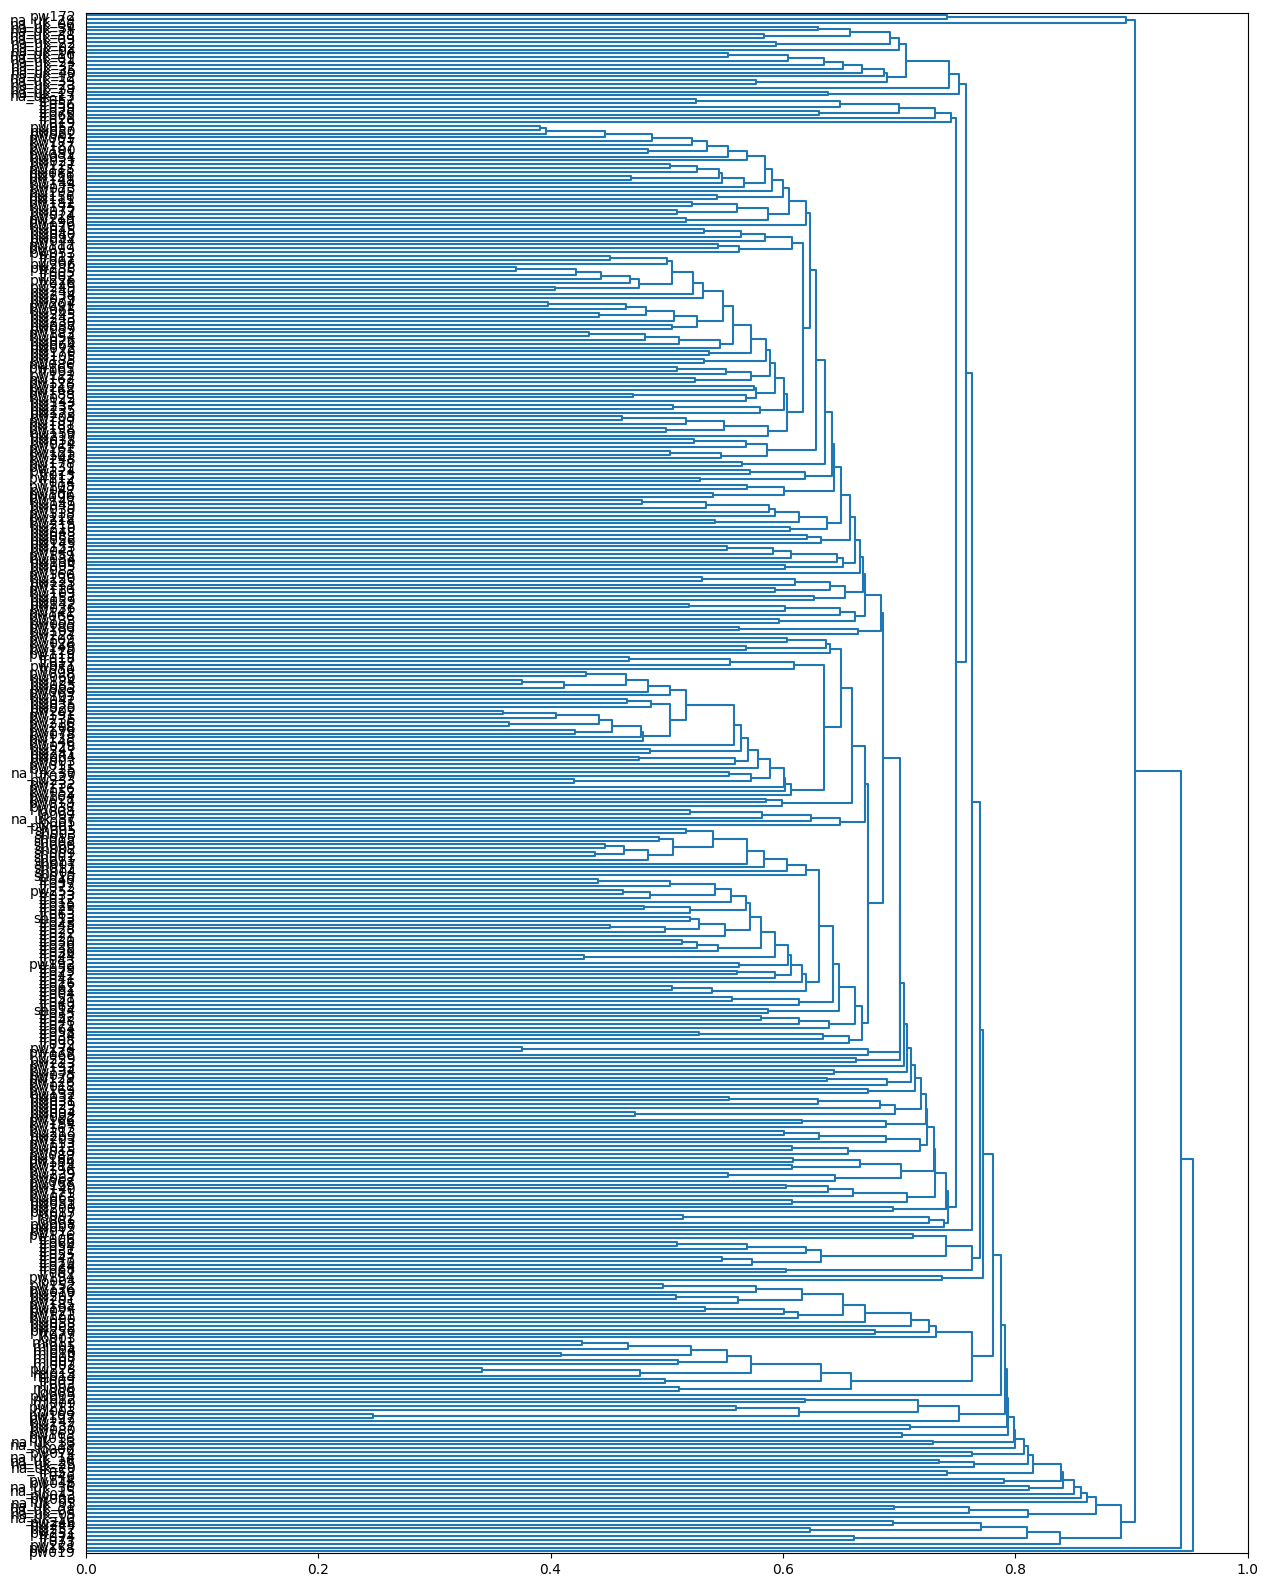

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 20))

# now with leafs on the left, and the root node on the right
scipy.cluster.hierarchy.dendrogram(linkage_matrix, labels = letters, color_threshold  = 0, orientation = 'right',
                                  leaf_font_size = 10)

plt.show()

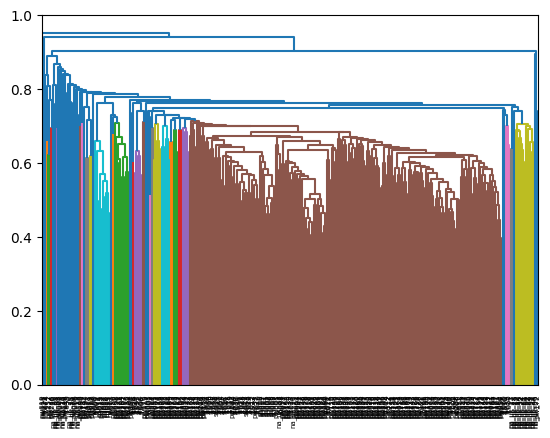

In [26]:
max_d = 0.75 * max(linkage_matrix[:,2])
scipy.cluster.hierarchy.dendrogram(linkage_matrix, labels = letters, color_threshold = max_d)

plt.show()

In [27]:
clusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, max_d, criterion = "distance")
print(clusters)

[45 45 26 45 45 34 45 45 26 33 45 45 45 45 45 45 45 45 48 45 45 45 45 33
 45 47 45 45 45 45 33 45 45 45 45 45 45 45 46 45 45 45 45 45 45 12 33 45
 45 45 45 45 13 33 33 46 46 45 45 33 45 45 45 45 46 45 32 32 45 46 45 45
  1  1 45 45 27 35 35 29 30 45 54 45 45 26 26 23 26 26 26 26 26 24 26 26
 24 26 26 50 50 57 50  6 60  5 50  7 50 49 17  8 50 19 16 50 50 50 50 14
 15 49 51 58 45  5 50 20 50 50  9 45 50 50 50 45 28 45 45 45 56 37 36 53
 28 45 45 52 45 41 21 38 45 62 45 45 45 41 45 28 45 45 45 44 45 44 44 44
 45 45 45 45 45 45 45 45 45 55 45 45 10 45 45 45 45 39 45 45 45 39 45 45
 28 45 45 45 45 39 45 45 45 40 40 45 45 45 45 45 18 45 45 45 45 45 22 45
 45 45 45 45 45 45 45 41 28 45 44 45 44 45 45 45 45 45 45 45 45 45 28 45
 45 45 45 45 45 45 45 42 11 45 45 45 45 45 45 28 45 45 45 45 45 45 45 45
 45 45 45 45 45 45 28 22 45 45 39 45 45 45 45 45 45 45 45 45 45 45 28 45
 43 39 45 45 61 45 45 45 45 21 45 45 43 43 45 45 45 39 59 45 45 45 34 45
 45 45 45 45 45 45 40 28 40 45 45 45 45 45 45 45 31

In [44]:
# printing the contents of each cluster
from collections import defaultdict

cluster2blog = defaultdict(list)
for bid, clusterid in enumerate(clusters):
    cluster2blog[clusterid].append(letters[bid])

for cId, blog in cluster2blog.items():
    print(cId, blog)

1 ['arc71', 'hl_01', 'hl_02', 'hl_03a', 'hl_03b', 'hl_04', 'hl_05', 'hl_06', 'hl_07', 'hl_08', 'hl_09', 'hl_10', 'hl_11', 'hl_12', 'hl_13', 'hl_14', 'hl_15', 'hl_17', 'hl_18']
2 ['hl_16']
3 ['na_uk_01', 'na_uk_02', 'na_uk_03', 'na_uk_04', 'na_uk_05', 'na_uk_07', 'na_uk_08', 'na_uk_09', 'na_uk_10', 'na_uk_11', 'na_uk_12', 'na_uk_13', 'na_uk_14', 'na_uk_15', 'na_uk_16', 'na_uk_17', 'na_uk_18', 'na_uk_19', 'na_uk_20', 'na_uk_21', 'na_uk_22', 'na_uk_23', 'na_uk_24', 'na_uk_25', 'na_uk_26', 'na_uk_27', 'na_uk_28', 'na_uk_30', 'na_uk_31', 'na_uk_32', 'na_uk_33', 'na_uk_34', 'na_uk_35', 'na_uk_36', 'na_uk_37', 'na_uk_38', 'na_uk_39', 'na_uk_40', 'na_uk_41', 'na_uk_42', 'na_uk_43', 'na_uk_44', 'na_uk_45', 'na_uk_46', 'na_uk_47', 'na_uk_48', 'na_uk_49', 'na_uk_50', 'na_uk_51', 'na_uk_52', 'na_uk_53', 'na_uk_54', 'new1', 'new2', 'new3', 'uk_na_55']
5 ['na_uk_06']
4 ['na_uk_29']


In [ ]:
AAAAAA  YOU FUCKED UP EARLIERRRR AAA


In [49]:
import nltk
from nltk.corpus import wordnet as wn


# Map universal POS tags to WordNet POS tags
un2wn_mapping = {
    "VERB": wn.VERB,
    "NOUN": wn.NOUN,
    "ADJ": wn.ADJ,
    "ADV": wn.ADV
}

lemmatizer = nltk.WordNetLemmatizer()

def preprocess_letters(letter_list):
    processed_letters = []

    for letter in letter_list:
        lemmatized_letter = []

        # Split by newlines and tokenize (also splits by spaces)
        words = nltk.word_tokenize(letter.replace('\n', ' '))

        # POS tag using universal tagset
        tagged = nltk.pos_tag(words, tagset="universal")

        for word, pos in tagged:
            # Use the mapped POS tag if available
            if pos in un2wn_mapping:
                lemma = lemmatizer.lemmatize(word, pos=un2wn_mapping[pos])
            else:
                lemma = lemmatizer.lemmatize(word)

            lemmatized_letter.append(lemma.lower())

        processed_letters.append(lemmatized_letter)

    return processed_letters

# Example usage:
letters = [
    "My dear friend,\nI hope you are well. I miss our talks.",
    "The weather here is dreadful.\nRain falls every day.\nRegards, John."
]

processed = preprocess_letters(letters)
print(processed)


[['my', 'dear', 'friend', ',', 'i', 'hope', 'you', 'be', 'well', '.', 'i', 'miss', 'our', 'talk', '.'], ['the', 'weather', 'here', 'be', 'dreadful', '.', 'rain', 'falls', 'every', 'day', '.', 'regards', ',', 'john', '.']]


In [ ]:
inaug_dictionary = words

In [ ]:
AAAAAAAAAAAAAAAAA START HERE


In [ ]:
# Topic Modelling

In [83]:
# List of words to remove
words_to_remove = {"get", "go", "one", "david", "may", "good", "letter", "think", "send", "day", "time", "come", "take", "1917", "well", "say", "tell", "write", "two"
,"know","much","would","make"}


# Remove unwanted words
filtered = [
    [word for word in sublist if word.lower() not in words_to_remove]
    for sublist in splitletters
]



In [84]:
import scipy
from gensim import corpora

inaug_dictionary = corpora.Dictionary(filtered)
print('Number of unique tokens:', len(inaug_dictionary))
print(inaug_dictionary)



Number of unique tokens: 7397
Dictionary<7397 unique tokens: ['%', '100', '3', '30', '4']...>


In [85]:
import itertools
# let's check each token's unique id
print(dict(itertools.islice(inaug_dictionary.token2id.items(), 12)))
print("word with id 8:", inaug_dictionary[8])
print("frequency of token 8:", inaug_dictionary.dfs[8])

{'%': 0, '100': 1, '3': 2, '30': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, 'a.b.c': 9, 'account': 10, 'address': 11}
word with id 8: 8
frequency of token 8: 28


In [86]:
# Filter out words that occur in less than 10 documents, or more than 50% of the documents.
inaug_dictionary.filter_extremes(no_below=5, no_above=0.99)
print('Number of unique tokens:', len(inaug_dictionary))

Number of unique tokens: 2010


In [88]:
# Bag-of-words representation of the documents
inaug_bow_corpus = [inaug_dictionary.doc2bow(d) for d in filtered]

In [89]:
from operator import itemgetter 
# which words (and how often) appear in the first document?
for i, freq in sorted(inaug_bow_corpus[-1], key=itemgetter(1), reverse=True)[:15]:
    print(inaug_dictionary[i], "-->", freq)
print("...")

mr --> 4
see --> 3
line --> 3
little --> 2
london --> 2
might --> 2
office --> 2
fine --> 2
let --> 2
suppose --> 2
since --> 2
france --> 2
trench --> 2
30 --> 1
address --> 1
...


In [122]:
from gensim import models
inaug_ldamodel = models.ldamodel.LdaModel(inaug_bow_corpus, num_topics=8, id2word = inaug_dictionary,
                                           eval_every = 20,
                                           update_every=1,
                                           chunksize=200,
                                           passes=40,
                                           alpha='auto',
                                           per_word_topics=True)

In [123]:
# the setting formatted=False allows you to get rid of the word*probability format when retrieveing topics
inaug_ldamodel.show_topics(formatted=False, num_words=10)

[(0,
  [('line', 0.03668987),
   ('section', 0.022068331),
   ('u', 0.013976522),
   ('receive', 0.013750235),
   ('officer', 0.013711355),
   ('lot', 0.01367814),
   ('quite', 0.013529492),
   ('regiment', 0.013518718),
   ('last', 0.013511242),
   ('trench', 0.010971483)]),
 (1,
  [('parcel', 0.027610604),
   ('lb', 0.02483258),
   ('ethel', 0.023372706),
   ('1', 0.022490786),
   ('love', 0.022416085),
   ('tin', 0.021950457),
   ('ginger', 0.01976094),
   ('card', 0.015720863),
   ('news', 0.014273686),
   ('linn', 0.012303871)]),
 (2,
  [('taylor', 0.014533869),
   ('mr', 0.013223738),
   ('last', 0.011251672),
   ('morning', 0.011193234),
   ('dear', 0.0102927275),
   ('look', 0.009810048),
   ('week', 0.009518202),
   ('mrs', 0.008819745),
   ('home', 0.008529274),
   ('work', 0.008453296)]),
 (3,
  [('thing', 0.010522087),
   ('see', 0.007450012),
   ('course', 0.007433242),
   ('like', 0.0072760116),
   ('back', 0.0065783854),
   ('men', 0.0065128403),
   ('way', 0.006227171),

In [124]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(inaug_ldamodel, inaug_bow_corpus, inaug_dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.065999  0.021184       1        1  55.852620
2     -0.031807 -0.027509       2        1  36.819063
1     -0.203484 -0.040927       3        1   2.725890
0      0.268766 -0.005180       4        1   2.356755
5      0.210144 -0.285257       5        1   1.139109
6      0.216747  0.290196       6        1   0.870871
7     -0.201998  0.023921       7        1   0.220249
4     -0.192368  0.023572       8        1   0.015442, topic_info=         Term        Freq       Total Category  logprob  loglift
197       see  416.000000  416.000000  Default  30.0000  30.0000
440        mr  372.000000  372.000000  Default  29.0000  29.0000
311      give  358.000000  358.000000  Default  28.0000  28.0000
225     thing  423.000000  423.000000  Default  27.0000  27.0000
538    taylor  366.000000  366.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1066     wait    0.004244   93.457851   Topic8  -7.8062  -1.2240
530   service    0.004244   25.934754   Topic8  -7.8062   0.0579
1575  longing    0.004244    7.514281   Topic8  -7.8062   1.2967
1722     save    0.004244   37.946052   Topic8  -7.8062  -0.3226
295    excuse    0.004244   13.368092   Topic8  -7.8063   0.7206

[471 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
547       1  0.146985     1
547       2  0.305276     1
547       3  0.463567     1
547       5  0.067839     1
1404      2  0.404617  13th
...     ...       ...   ...
405       1  0.650085     –
405       2  0.350570     –
699       1  0.844107     ‘
699       2  0.052757     ‘
699       6  0.105513     ‘

[740 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 6, 7, 8, 5])

In [125]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=inaug_ldamodel, corpus=inaug_bow_corpus, texts=filtered, dictionary=inaug_dictionary, coherence='c_v')
# The higher the better. A coherence score of .4 is bad, it means you're probably not using the right number of topics; .6 is great. Anything more is suspiciously great.
coherence = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence)


Coherence Score:  0.3812191850928577


In [92]:
import numpy as np

docs_id = letterkeys

doc2topics = np.zeros((len(docs_id), inaug_ldamodel.num_topics))

for di, doc_topics in enumerate(inaug_ldamodel.get_document_topics(inaug_bow_corpus, minimum_probability = 0)):
    for ti, v in doc_topics:
        doc2topics[di, ti] = v

# print(doc2topics)

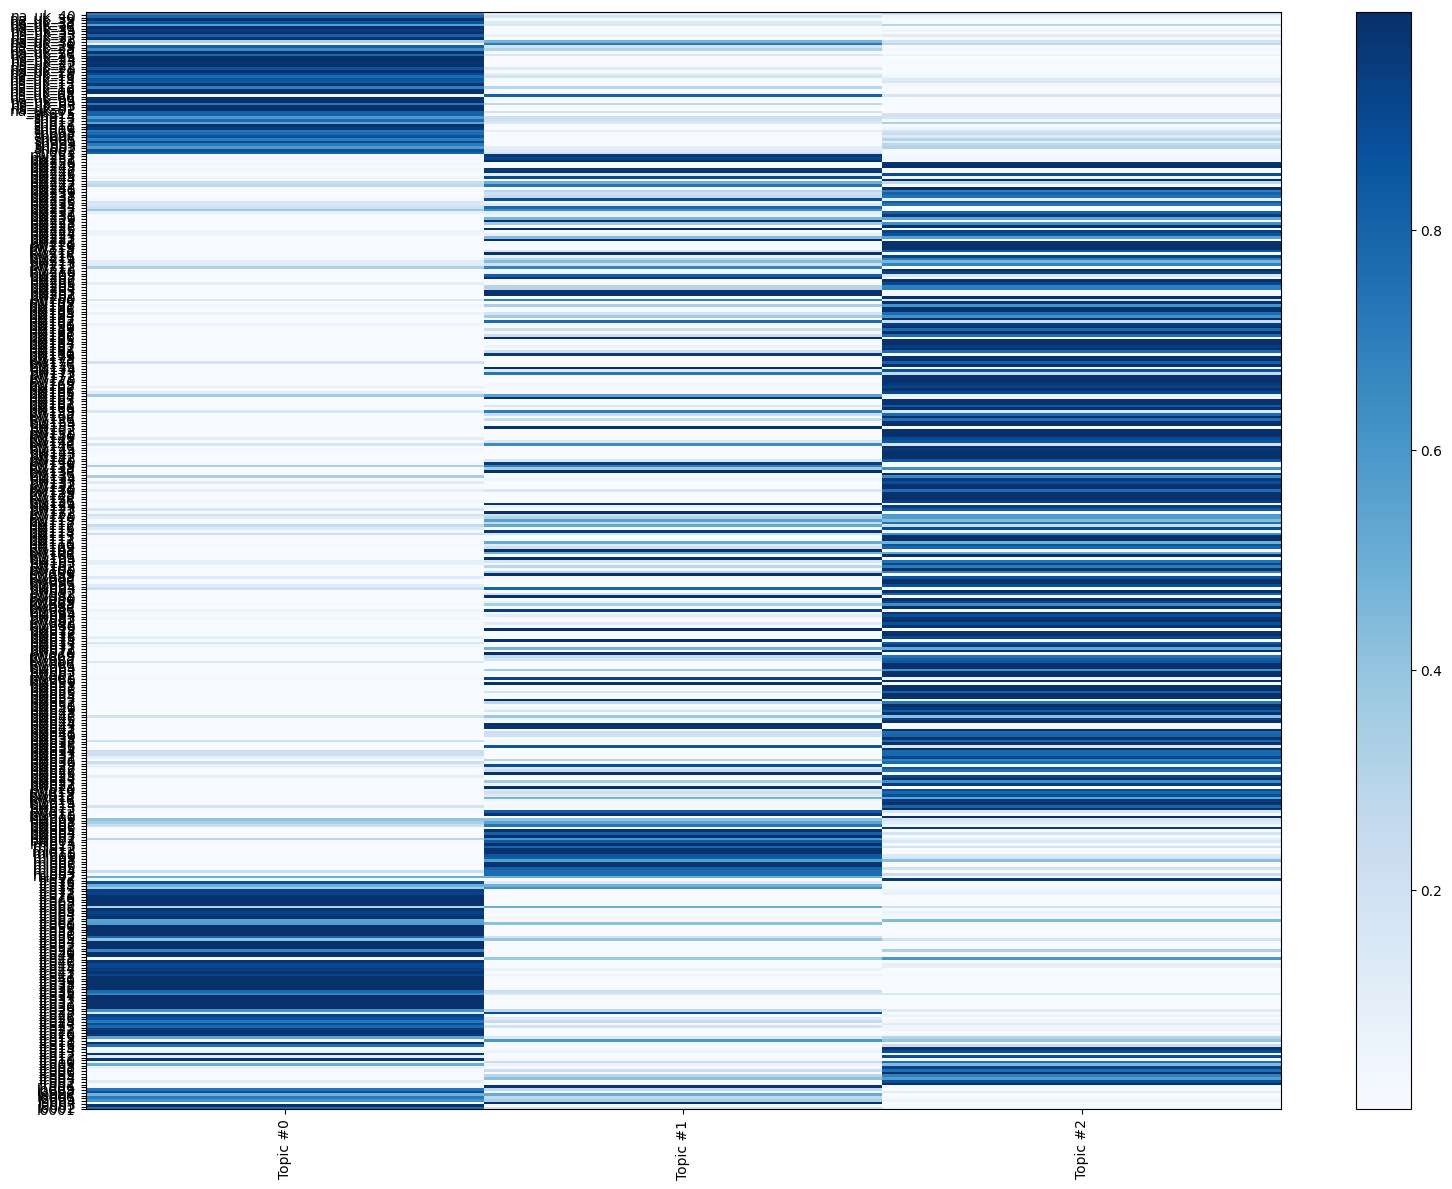

In [93]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 12))
plt.pcolor(doc2topics, norm=None, cmap='Blues')
plt.yticks(np.arange(doc2topics.shape[0]), docs_id)
plt.xticks(np.arange(doc2topics.shape[1])+0.5, ["Topic #"+str(n) for n in range(inaug_ldamodel.num_topics)], rotation = 90)
plt.colorbar(cmap='Blues')  # plot colorbar
plt.tight_layout()  # fixes margins
plt.show()

In [109]:
corpus = inaug_bow_corpus
dictionary = inaug_dictionary
lda_model = inaug_ldamodel
lemmas = filtered

In [117]:
def compute_coherence_values(dictionary, corpus, texts, limit=50, start=10, step=10):
    """
    Compute c_v coherence for various number of topics    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA    
    model with respective number of topics
    """    
    coherence_values = []
    model_list = []
    total_amount = limit / step
    current_amount = 0
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                    id2word=dictionary, num_topics=num_topics,
                    random_state=100, update_every=1, chunksize=500, 
                    passes=10, alpha='auto', per_word_topics=False)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,   
                    dictionary=dictionary, coherence='c_v')  
        coherence_values.append(coherencemodel.get_coherence())
        current_amount += 1
        print("Built " + str(current_amount) + " of " + 
                    str(total_amount) + " models")
    return model_list, coherence_values

In [118]:
import gensim
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=lemmas, start=3, limit=25, step=5)

Built 1 of 5.0 models
Built 2 of 5.0 models
Built 3 of 5.0 models
Built 4 of 5.0 models
Built 5 of 5.0 models


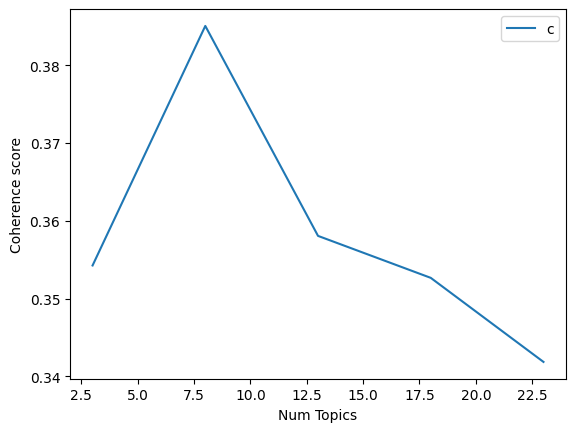

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
limit=25; start=3; step=5
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
berttopic